### Feature Engineering
I load the cleaned dataset and create features around my domain knowledge, create interaction features, group sparse classes, encode dummy variables, and remove redunadant features. Details for the features I create are shown below. Finally, I save the table as an analytical base table (ABT) to use for modeling. 



In [46]:
from __future__ import print_function  # Compatability with Python 3
print( 'Print function ready to serve.' )

Print function ready to serve.


In [47]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.options.mode.chained_assignment = None  # default='warn'

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [48]:
# Load cleaned dataset from Module 2
df = pd.read_csv('cleaned_df.csv')

In [49]:
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


<br id="domain">
# 1. Domain Knowledge

I create two features: "two_and_two" and "during_recession." "Two_and_two" is an indicator feature for 2-bed 2-bath houses. I created this b/c I believed that it would be a common property type. It was not...only 9% were two_and_two. That's okay.

"during_recession" was an indicator feature for transaction prices that happened b/w 2010 and 2013, during the housing market recession. I create this feature using different ways of coding. 

In [50]:
# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df.beds==2) & (df.baths==2)).astype(int)

In [51]:
# Display percent of rows where two_and_two == 1
df.two_and_two.mean()

0.09453000531067446

In [52]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = ((df.tx_year>=2010) & (df.tx_year<=2013)).astype(int)

In [53]:
# Print percent of transactions where during_recession == 1
df.during_recession.mean()

0.2634094530005311

In [54]:
# Set variable a as the earlier indicator variable (combining two masks)
a = ((df.tx_year>=2010) & (df.tx_year<=2013)).astype(int)

# Set variable b as the new indicator variable (using "between")
b = df.tx_year.between(2010,2013).astype(int)

# Are a and b equivalent?
all(a==b)

True

In [55]:
# Create indicator feature for transactions between 2010 and 2013, inclusive
df['during_recession'] = df.tx_year.between(2010,2013).astype(int)

<br id="interaction">
# 2. Create interaction features

I created 2 interaction features: property_age and school_score. 

property_age is the time b/w the year property was built and the transaction year. This feature was interesting b/c upon examination, I found that there were some elements that had their transaction year before the build year, which doesn't make logical sense. I deleted those records. 

school_score was a feature to indicate the quality of schools nearby a house. This was calculated by num schools around house * the median score of school, which results in a score that indicates the number of good schools around. 




In [56]:
# Create a property age feature
df['property_age'] = df.tx_year - df.year_built

In [57]:
# Why the heck is this the min value. Should not be less than 0
print(df.property_age.min())

-8


In [1]:
# Number of observations with 'property_age' < 0. Why is this number 19 oh god.
print(sum(df.property_age<0))

NameError: name 'df' is not defined

In [59]:
# Remove rows where property_age is less than 0
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print( len(df) )

1864


In [60]:
# Create a school score feature that num_schools * median_school
df['school_score'] = df['num_schools'] * df['median_school']

In [61]:
# Display median school score
df.school_score.median()

18.0

<br id="group">
# 3. Group sparse classes

There were many similar sparse classes in the categorical data. Details of each sparse class grouping are shown in code. 

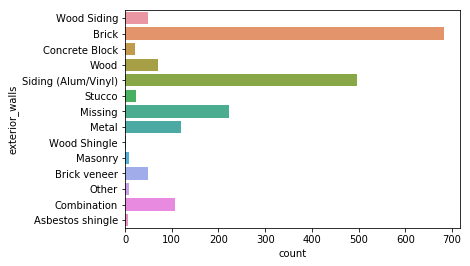

In [62]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)

In [63]:
# Group 'Wood Siding' and 'Wood Shingle' with 'Wood'
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

In [64]:
# List of classes to group
other = ['Stucco', 'Other', 'Asbestos shingle', 'Concrete Block', 'Masonry']

# Group other classes into 'Other'
df.exterior_walls.replace(other, 'Other', inplace=True)

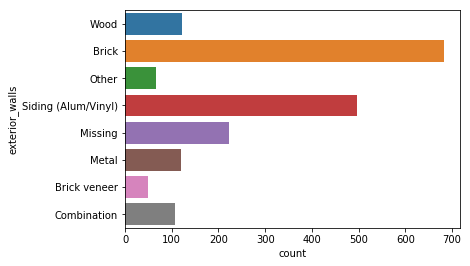

In [65]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

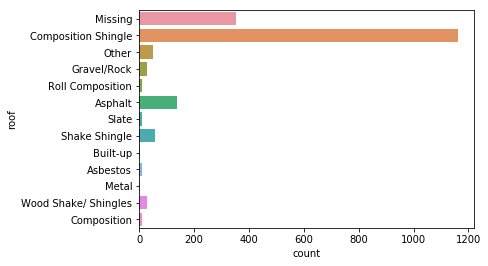

In [66]:
# Bar plot for roof
sns.countplot(y='roof', data=df)
plt.show()

In [67]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df.roof.replace(['Composition', 'Wood shake/ Shingles'], 'Composition Shingle', inplace=True)

In [68]:
# List of classes to group
otherList = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df.roof.replace(otherList, 'Other', inplace=True)

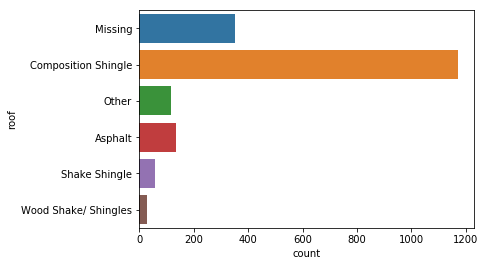

In [69]:
# Bar plot for roof
sns.countplot(y='roof', data=df)
plt.show()

<br id="dummy">
# 4. Encode dummy variables

Scikit learn does not allow categorical data, so I created dummy variables. I could have used one hot enocding or sparsevectors, but the dataset wasn't too big so doing a pd.get_dummies was sufficient.

In [70]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

In [71]:
# First 5 rows of dataframe
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,during_recession,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,roof_Wood Shake/ Shingles,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,1,0,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,1,49,24.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,0,5,27.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


<br id="remove">
# 5. Remove unused or redundant features

B/c the feature property_age = tx_year - year_built, 
tx_year and year_built are redundant

In [72]:
# Drop 'tx_year' and 'year_built' from the dataset
df = df.drop(['tx_year', 'year_built'], axis=1)

Save the analytical base table.

In [73]:
# Save analytical base table
df.to_csv('analytical_base_table.csv', index=None)